# CS549-02 Machine Learning: Irfan Khan 

# Assignment 4: Support vector machine (SVM) model

### Total: 10 points

In this assignment, we will build a "toy" SVM model using a mini dataset step by step.

Your goal is to run all the cells below one by one from top to bottom. Before you run some task cells, you need to complete the missing lines (notified by "= None" in Python) in them. 

For each **task** cell that requires your completion, you can run the **evaluation** cell right after it to check if your answer correct.
The output of the evaluation cell should be the same as the "expected output" provided. (Some mismatch in the last digit of floating numbers is tolerable)

---
# Install dependencies

**cvxopt** is a Python package for solving optimization problems including quadratic programming problems. You can install it using the following command:
```
conda install -c conda-forge cvxopt
```

In [3]:

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import matrix, solvers


# Toy data
X = np.array([
    [0, 0],
    [2, 0],
    [0, 2],
    [3, 3],
    [4, 4]
])
Y = np.array([-1, -1, -1, 1, 1],dtype=np.float64)

---

# Task
We want to build an SVM model on the toy dataset: 

\begin{equation}
    x^{(1)} = (0,0),\ y^{(1)}=-1\\
    x^{(2)} = (2,0),\ y^{(2)}=-1\\
    x^{(3)} = (0,2),\ y^{(3)}=-1\\
    x^{(4)} = (3,3),\ y^{(4)}=1\\
    x^{(5)} = (4,4),\ y^{(5)}=1\\
\end{equation}

We need to solve the quadratic programming (QP) problem as the following form:

\begin{equation}
    \min_{\alpha}\big( \frac{1}{2}\lambda^{T}Q\lambda - (\textbf{1})^{T}\lambda \big) \\
    \text{subject to: } y^{T}\lambda=0,\ \lambda\geq 0
\end{equation}

The quadratic programming optimization function, solvers, in cvxopt solves the QP in this form:

\begin{equation}
    \min_{x}\big( \frac{1}{2}x^{T}Px + q^{T}x \big) \\
    \text{subject to: } Gx\leq h,\ Ax = b
\end{equation}

Therefore, in order to use solvers, we need to establish the responding relationships between variables: 
$P=Q$, $q = -(\textbf{1})^{T}$, $G = -(\textbf{1})^{T}$, $h=(\textbf{0})^{T}$, $A=y^T$, $b=(\textbf{0})^{T}$



---
## Task 1: Compute matrix $Q$

**2 points**

First, we need to use $x^{(i)}$ and $y^{(i)}$ to compute matrix $Q$:

\begin{equation}
    Q = \begin{bmatrix}
    y^{(1)}y^{(1)}x^{(1)T}x^{(1)} & y^{(1)}y^{(2)}x^{(1)T}x^{(2)} & \dots & y^{(1)}y^{(5)}x^{(1)T}x^{(5)} \\
    y^{(2)}y^{(1)}x^{(2)T}x^{(1)} & y^{(2)}y^{(2)}x^{(2)T}x^{(2)} & \dots & y^{(2)}y^{(5)}x^{(2)T}x^{(5)} \\
    \vdots & \vdots & \ddots & \vdots \\
    y^{(5)}y^{(1)}x^{(5)T}x^{(1)} & y^{(5)}y^{(2)}x^{(5)T}x^{(2)} & \dots & y^{(5)}y^{(5)}x^{(5)T}x^{(5)} \\
    \end{bmatrix}
\end{equation}


In [4]:
### START YOUR CODE ###
# computar matriz Q com yi*yj*xi ( transposed ) *xj
Q = np.zeros((len(X), len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        Q[i, j] = Y[i] * Y[j] * np.dot(X[i].transpose(), X[j])

### END YOUR CODE ###

print('Q = ', Q)

Q =  [[ 0.  0.  0. -0. -0.]
 [ 0.  4.  0. -6. -8.]
 [ 0.  0.  4. -6. -8.]
 [-0. -6. -6. 18. 24.]
 [-0. -8. -8. 24. 32.]]


### Expected output
&nbsp;|&nbsp;
--|--
**Q =**|[[ 0.  0.  0.  0.  0.] <br>[ 0.  4.  0. -6. -8.] <br> [ 0.  0.  4. -6. -8.] <br> [ 0. -6. -6. 18. 24.] <br> [ 0. -8. -8. 24. 32.]]

---
## Task 2: Compute inputs for Quadratic Programming and Print them
**2 points**

Use the formulas: $P=Q$, $q = -(\textbf{1})^{T}$, $G = -(\textbf{1})^{T}$, $h=(\textbf{0})^{T}$, $A=y^T$, $b=(\textbf{0})^{T}$. Print P,q,G,h,b,A

In [5]:
### START YOUR CODE ###
#P = Q
P = Q

# Hint: Use np.ones(), q is of length 5
q = -1*np.ones((5,1))

# Hint: G is a matrix whose diagnal elements are 1s, and other elements are 0s. Use np.eye()
G = -1*np.eye(5)

# Hint: h is of length 5, with all zeros; Use np.zeros()
h = np.zeros((5,1))

#A = Y.reshape((1,5))
A = Y.reshape((1,5))


# Hint: b is of length 1, with zero value; Use np.zeros()
b = np.zeros((1,1))
### END YOUR CODE ###
print ('P=',P)
print('q = ', q)
print('G = ', G)
print('h = ', h)
print('b = ', b)
print ('A=',A)

P= [[ 0.  0.  0. -0. -0.]
 [ 0.  4.  0. -6. -8.]
 [ 0.  0.  4. -6. -8.]
 [-0. -6. -6. 18. 24.]
 [-0. -8. -8. 24. 32.]]
q =  [[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
G =  [[-1. -0. -0. -0. -0.]
 [-0. -1. -0. -0. -0.]
 [-0. -0. -1. -0. -0.]
 [-0. -0. -0. -1. -0.]
 [-0. -0. -0. -0. -1.]]
h =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
b =  [[0.]]
A= [[-1. -1. -1.  1.  1.]]


### Expected output
<img src="A4image1.png">

---

## Task 3: Call Quadratic Program Solver
**3 point**

Print ${\lambda}^{(i)}$, support_vector indices (indices where $\lambda^{(i)}>0)$ and support_vectors

In [6]:
### START YOUR CODE ###

# Hint: Call solvers.qp with the correct arguments but first convert numpy matrices 
#into cvxopt matrices using  command like cvx_P = cvxopt.matrix(P)
#solution = quadprog_solvers.qp(cvx_P, cvx_q, cvx_G, cvx_h, cvx_A, cvx_b). Use a threshold of 1e-5 to
#determine SV lambdas
cvx_P = cvxopt.matrix(P)
cvx_q = cvxopt.matrix(q)
cvx_G = cvxopt.matrix(G)
cvx_h = cvxopt.matrix(h)
cvx_A = cvxopt.matrix(A)
cvx_b = cvxopt.matrix(b)

solution = solvers.qp(cvx_P, cvx_q, cvx_G, cvx_h, cvx_A, cvx_b)

# how to discover the support vectors
threshold = 1e-5
lambdas = np.array(solution['x'])
support_vectors = np.where(lambdas > threshold)[0]

print('lambdas = ', lambdas)
print('support_vectors_indices = ', support_vectors)
print('support_vectors = ', X[support_vectors])

### END YOUR CODE ###


     pcost       dcost       gap    pres   dres
 0: -6.1743e-01 -1.1368e+00  9e+00  3e+00  1e+00
 1: -1.2620e-01 -7.0499e-01  9e-01  1e-01  6e-02
 2: -2.1371e-01 -3.2685e-01  1e-01  6e-17  4e-16
 3: -2.4712e-01 -2.5138e-01  4e-03  6e-17  3e-16
 4: -2.4997e-01 -2.5001e-01  4e-05  1e-17  1e-16
 5: -2.5000e-01 -2.5000e-01  4e-07  3e-17  4e-16
 6: -2.5000e-01 -2.5000e-01  4e-09  6e-17  2e-16
Optimal solution found.
lambdas =  [[2.59450615e-09]
 [1.24999998e-01]
 [1.24999998e-01]
 [2.49999999e-01]
 [2.90286660e-10]]
support_vectors_indices =  [1 2 3]
support_vectors =  [[2 0]
 [0 2]
 [3 3]]


### Expected output

<img src="A4image2.png">

## Task 4: Solve the decision boundary
**1 points**

Use the support vectors to solve the $w$ and $b$ in the decision boundary $w^Tx+b=0$. Use the property that a support vector $x^{(k)}$ must satistify $y^{(k)}(w^Tx^{(k)}+b) = 1$.

*Hint*: You should solve the following linear equations:

$\begin{cases} y^{(2)}(w^Tx^{(2)}+b) = 1 \\ y^{(3)}(w^Tx^{(3)}+b) = 1 \\ y^{(4)}(w^Tx^{(4)}+b) = 1\end{cases}$

Solve using numpy linalg.solve.

In [19]:

###START YOUR CODE
# solve linear quations : 

# compute w and b # como encontrar b e w
w = np.zeros((2,1))
b = 0
for i in support_vectors:
    w += lambdas[i] * Y[i] * X[i].reshape((2,1))
    b += Y[i] - np.dot(w.transpose(), X[i].reshape((2,1)))


print('w1 = ', w[0])
print('w2 = ', w[1])
print('b = ', b/len(support_vectors)) # wrong value
###End Your Code

w1 =  [0.5]
w2 =  [0.5]
b =  [[-1.]]


## Expected Output

w1=0.5

w2=0.5

b = -2.0


# Task 5: Use sklearn.svm to obtain Support Vectors Directly
**2 points**

Use sklearn.svm and print the support vectors and plot the SVM decision boundary

In [20]:
#Dont change the code in this cell
def plot_decision_boundary(X, classifier, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

[[2. 0.]
 [0. 2.]
 [3. 3.]]


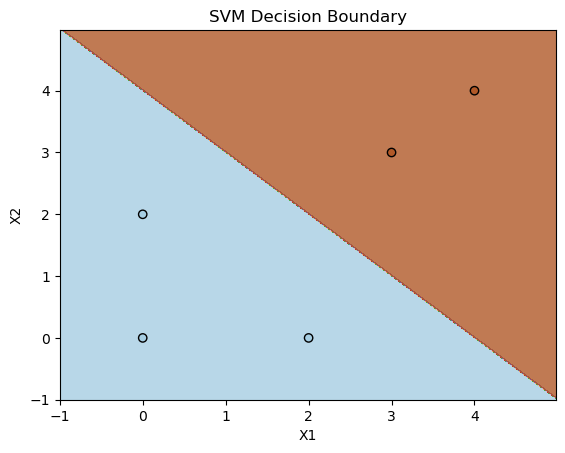

In [22]:
# Import necessary libraries

from sklearn.svm import SVC


#Begin Code

# Initialize the SVM model, "svm_model", linear Kernel, Use default value for C=1 
svm_model = SVC(kernel='linear', C=1)

# Train the SVM model (svm_model) with X and Y and obtain the support_vectors using svm_model.support_vectors_
svm_model.fit(X, Y)
support_vectors = svm_model.support_vectors_

#End Code

print (support_vectors)

plot_decision_boundary(X, svm_model, 'SVM Decision Boundary')

# Expected Result
[[2. 0.]<br>
 [0. 2.]<br>
 [3. 3.]]
<img src="A4image3.png">